What are the most demanded skills for the top 3 most popular data roles?

Methodology:

1. Clean up skill column
2. Calculate skill count based on 'job_title_short'
3. calculate skill percentage
4. Plot final findings

In [1]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt

ay = pd.read_csv('hf://datasets/lukebarousse/data_jobs/data_jobs.csv')

ay['job_posted_date'] = pd.to_datetime (ay['job_posted_date'])

ay['job_skills']= ay['job_skills'].apply(lambda skill_list: 
                                         ast.literal_eval(skill_list) 
                                         if pd.notna (skill_list) else skill_list)

c:\Users\EMMANUEL\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ay_US = ay[ay['job_country'] == 'United States']

ay_US.sample()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
613551,Data Analyst,Data Engineering Sr Analyst (Hybrid) - Now Hiring,"Minneapolis, MN",via Snagajob,Full-time,False,"Illinois, United States",2023-07-05 12:10:16,False,True,United States,NaN,NaN,NaN,Securian Financial Group,"[sql, aws, tableau, flow]","{'analyst_tools': ['tableau'], 'cloud': ['aws'..."


In [3]:
ay_skills = ay_US.explode('job_skills')

ay_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,NaN
3,Data Engineer,python
3,Data Engineer,c++
3,Data Engineer,java
3,Data Engineer,matlab
...,...,...
785692,Data Scientist,r
785703,Data Analyst,NaN
785705,Data Analyst,sql
785705,Data Analyst,python


In [4]:
ayy_skills_count= ay_skills.groupby('job_title_short')['job_skills'].size()

ayy_skills_count

job_title_short
Business Analyst              26518
Cloud Engineer                 1941
Data Analyst                 254289
Data Engineer                250493
Data Scientist               322290
Machine Learning Engineer      5517
Senior Data Analyst           53025
Senior Data Engineer          76957
Senior Data Scientist         73388
Software Engineer              9147
Name: job_skills, dtype: int64

In [5]:
ay_skills_count= ay_skills.groupby(['job_skills', 'job_title_short']).size()

ay_skills_count


job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [6]:
type(ay_skills_count)
# this gives a series. transform to dataframe

pandas.core.series.Series

In [7]:
ay_skills_count= ay_skills.groupby(['job_skills', 'job_title_short']).size()

ay_skills_count = ay_skills_count.reset_index(name='Number of skills')

ay_skills_count.sort_values(by='Number of skills', ascending=False, inplace=True)

ay_skills_count

,job_skills,job_title_short,Number of skills
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [8]:
job_titles = ay_skills_count['job_title_short'].unique().tolist()

job_titles = sorted (job_titles[0:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

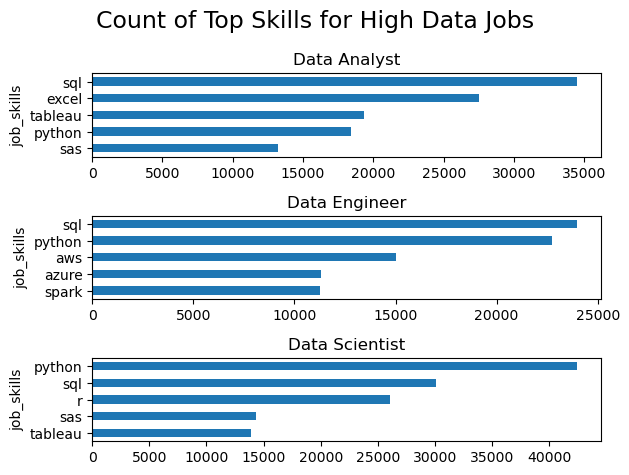

In [9]:
fig, ax = plt.subplots (len (job_titles), 1)

for i, jbt in enumerate (job_titles):
    ay_plot = ay_skills_count[ay_skills_count['job_title_short'] == jbt].head(5)
    ay_plot.plot (kind='barh',x='job_skills', y='Number of skills', ax=ax[i], title= jbt)
    ax[i].legend().set_visible(False)
    ax[i].invert_yaxis()

fig.suptitle ('Count of Top Skills for High Data Jobs', fontsize= 17)
plt.tight_layout()
plt.show()
    

In [10]:
ay_jbt_count = ay_US['job_title_short'].value_counts().reset_index(name='jobs_total')

ay_jbt_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [11]:
ay_skills_count

,job_skills,job_title_short,Number of skills
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [12]:
ay_skills_perc = pd.merge(ay_skills_count,ay_jbt_count, how='left', on='job_title_short')

ay_skills_perc

,job_skills,job_title_short,Number of skills,jobs_total
0,python,Data Scientist,42379,58830
1,sql,Data Analyst,34452,67816
2,sql,Data Scientist,30034,58830
3,excel,Data Analyst,27519,67816
4,r,Data Scientist,26022,58830
...,...,...,...,...
1865,clojure,Software Engineer,1,1814
1866,vb.net,Senior Data Scientist,1,12946
1867,fortran,Machine Learning Engineer,1,921
1868,planner,Cloud Engineer,1,423


In [13]:
ay_skills_perc['skill_percent'] = (
    ay_skills_perc['Number of skills'] / ay_skills_perc['jobs_total'] 
    ) * 100

ay_skills_perc

,job_skills,job_title_short,Number of skills,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


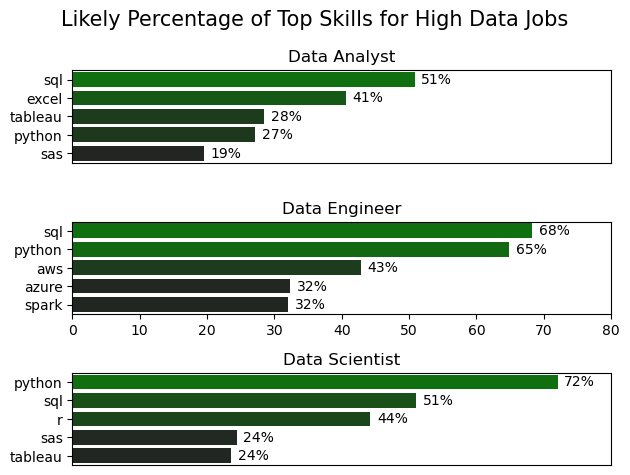

In [54]:
fig, ax = plt.subplots (len(job_titles), 1)

for i, jbt in enumerate (job_titles):
    ay_plot = ay_skills_perc[ay_skills_perc['job_title_short'] == jbt].head(5)
    sns.barplot (
        data=ay_plot,
        x='skill_percent',
        y='job_skills', 
        ax=ax[i], 
        hue='skill_percent',
        palette='dark:g'
        )
    
    ax[i].set_title (jbt)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim (0,80)
    #ax[i].set_xticks ([]) OR
    if i != len(job_titles) -2:
        ax[i].set_xticks([])

    for n, v in enumerate(ay_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle ('Likely Percentage of Top Skills for High Data Jobs', fontsize= 15)
fig.tight_layout()
plt.show()
